In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
data_path = 'clean_FineTech_appData.csv'
customer_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and the data types of each column
customer_data.head(), customer_data.dtypes


(   Unnamed: 0    user  dayofweek  hour  age  numscreens  minigame  \
 0           0  235136          3     2   23          15         0   
 1           1  333588          6     1   24          13         0   
 2           2  254414          1    19   23           3         0   
 3           3  234192          4    16   28          40         0   
 4           4   51549          1    18   31          32         0   
 
    used_premium_feature  enrolled  liked  ...  SecurityModal  ResendToken  \
 0                     0         0      0  ...              0            0   
 1                     0         0      0  ...              0            0   
 2                     1         0      1  ...              0            0   
 3                     0         1      0  ...              0            0   
 4                     0         1      1  ...              0            0   
 
    TransactionList  NetworkFailure  ListPicker  remain_screen_list  \
 0                0               0  

In [2]:
customer_data = customer_data.drop(['Unnamed: 0'], axis=1)
customer_data = customer_data.drop("ProfileChildren ", axis=1)
customer_data

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [3]:
from scipy.stats import chi2_contingency

# Identify all binary columns
binary_columns = [col for col in customer_data.columns if customer_data[col].nunique() == 2]

# Create a dictionary to store p-values from chi-square tests
chi_square_results = {}

for col in binary_columns:
    # Constructing the contingency table
    contingency_table = pd.crosstab(customer_data[col], customer_data['enrolled'])
    # Perform the Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    # Store the p-value corresponding to the test
    chi_square_results[col] = p

# Filter results to show only those variables with significant p-values (p < 0.05)
significant_chi_square_results = {k: v for k, v in chi_square_results.items() if v < 0.05}
significant_chi_square_results

{'minigame': 0.022415479101004665,
 'used_premium_feature': 1.0917913817684498e-26,
 'enrolled': 0.0,
 'location': 0.0,
 'Institutions': 0.04719787373062467,
 'VerifyPhone': 0.0,
 'BankVerification': 0.0,
 'VerifyDateOfBirth': 0.0,
 'ProfilePage': 2.2607178205019624e-09,
 'VerifyCountry': 0.0,
 'Cycle': 1.2348732488788239e-92,
 'idscreen': 0.0,
 'Splash': 1.360676606225607e-17,
 'RewardsContainer': 0.015451647138783517,
 'Finances': 1.0197685730629454e-28,
 'Alerts': 5.958678697692519e-225,
 'Leaderboard': 0.00475562326061741,
 'VerifyMobile': 1.751896295185995e-257,
 'VerifyHousing': 1.300135850208171e-18,
 'RewardDetail': 2.486167321485173e-06,
 'VerifyHousingAmount': 4.873439290375567e-20,
 'ProfileMaritalStatus': 0.001279298998704523,
 'ProfileEducation': 8.343952896849845e-06,
 'ProfileEducationMajor': 1.2842006994438508e-07,
 'Rewards': 1.4935015108085087e-15,
 'AccountView': 1.0093294904600182e-48,
 'VerifyAnnualIncome': 2.98679005829175e-21,
 'VerifyIncomeType': 1.0486393991598

The Chi-square test results show that many binary variables are statistically significant with respect to the enrolled status (p-value < 0.05). 

Some of these significant variables include:

Usage of premium features (used_premium_feature)
Verification of phone (VerifyPhone), date of birth (VerifyDateOfBirth), and other personal information
Engagement with different app features like minigame, alerts, finances, and more


This suggests these features are related to whether a user is likely to enroll or not. Each of these significant relationships indicates a dependency between user interactions/features and their enrollment status.

In [4]:
from scipy.stats import mannwhitneyu

# Identify numeric columns (excluding binary variables and the user identifier)
numeric_columns = [col for col in customer_data.columns if customer_data[col].nunique() > 2 and col != 'user']

# Create a dictionary to store p-values from Mann-Whitney U tests
mann_whitney_results = {}

for col in numeric_columns:
    # Split data into two groups: enrolled and not enrolled
    group1 = customer_data[customer_data['enrolled'] == 0][col]
    group2 = customer_data[customer_data['enrolled'] == 1][col]
    
    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    mann_whitney_results[col] = p

# Filter results to show only those variables with significant p-values (p < 0.05)
significant_mann_whitney_results = {k: v for k, v in mann_whitney_results.items() if v < 0.05}
significant_mann_whitney_results


{'dayofweek': 0.0012067335547983544,
 'hour': 1.579299279813777e-30,
 'age': 2.3910540280338208e-262,
 'numscreens': 0.0,
 'remain_screen_list': 0.0,
 'saving_screens_count': 1.4227613006168807e-06,
 'credit_screens_count': 0.0,
 'cc_screens_count': 0.00035195203915489194,
 'loan_screens_count': 1.0801980033361591e-138}

The Mann-Whitney U test results also reveal several numeric variables with statistically significant differences between the enrolled and not-enrolled users:

dayofweek and hour of app usage, age of the user, Number of screens (numscreens) interacted with and Various counts of specific screens like credit_screens_count, cc_screens_count, and loan_screens_count.

These findings suggest that these variables might be important predictors of enrollment. For instance, differences in age and the extent of app interaction (numscreens) could be leveraged to understand and predict user behavior regarding enrollment.

In [5]:
# check sphercity before anova
from scipy.stats import levene

# Create a dictionary to store p-values from Levene's test
levene_results = {}

for col in numeric_columns:
    # Split data into two groups: enrolled and not enrolled
    group1 = customer_data[customer_data['enrolled'] == 0][col]
    group2 = customer_data[customer_data['enrolled'] == 1][col]
    
    # Perform Levene's test
    stat, p = levene(group1, group2)
    levene_results[col] = p

# Filter results to show only those variables with significant p-values (p < 0.05)
significant_levene_results = {k: v for k, v in levene_results.items() if v < 0.05}
print(significant_levene_results)

from scipy.stats import f_oneway

# Create a dictionary to store p-values from ANOVA tests
anova_results = {}

for col in numeric_columns:
    # Split data into two groups: enrolled and not enrolled
    group1 = customer_data[customer_data['enrolled'] == 0][col]
    group2 = customer_data[customer_data['enrolled'] == 1][col]
    
    # Perform ANOVA test
    stat, p = f_oneway(group1, group2)
    anova_results[col] = p

# Filter results to show only those variables with significant p-values (p < 0.05)
significant_anova_results = {k: v for k, v in anova_results.items() if v < 0.05}

print(significant_anova_results)

{'hour': 1.2234369926578173e-27, 'age': 5.190936884791035e-92, 'numscreens': 1.0008835221278927e-38, 'remain_screen_list': 3.282691125052662e-140, 'saving_screens_count': 1.7835852849406468e-07, 'credit_screens_count': 0.0, 'cc_screens_count': 1.2574077625696705e-07, 'loan_screens_count': 1.5950870373036631e-208}
{'dayofweek': 0.0010733212789651423, 'hour': 2.6128510571851e-35, 'age': 1.4065602826332243e-246, 'numscreens': 0.0, 'remain_screen_list': 0.0, 'saving_screens_count': 1.7835852849406468e-07, 'credit_screens_count': 0.0, 'cc_screens_count': 1.2574077625696705e-07, 'loan_screens_count': 1.6198299036551683e-187}


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# List of categorical variables for ANOVA (excluding binary)
categorical_columns = ['dayofweek', 'ProfileMaritalStatus', 'ProfileEducation']

# Dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each categorical variable
for col in categorical_columns:
    # Prepare the formula like 'enrolled ~ C(variable)'
    formula = f'enrolled ~ C({col})'
    model = ols(formula, data=customer_data).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = aov_table

anova_results


{'dayofweek':                     sum_sq       df         F    PR(>F)
 C(dayofweek)      7.275738      6.0  4.852812  0.000058
 Residual      12492.274262  49993.0       NaN       NaN,
 'ProfileMaritalStatus':                                sum_sq       df          F    PR(>F)
 C(ProfileMaritalStatus)      2.626892      1.0  10.509735  0.001188
 Residual                 12496.923108  49998.0        NaN       NaN,
 'ProfileEducation':                            sum_sq       df          F    PR(>F)
 C(ProfileEducation)      5.012097      1.0  20.056349  0.000008
 Residual             12494.537903  49998.0        NaN       NaN}

The ANOVA results for dayofweek, ProfileMaritalStatus, and ProfileEducation are as follows:

Day of Week: There is a statistically significant difference in enrollment across different days of the week (p = 0.000058).

Marital Status: There is a statistically significant difference in enrollment based on marital status (p = 0.001188).

Education Level: There is a statistically significant difference in enrollment based on education level (p = 0.000008).

These results indicate that there are significant variations in enrollment likelihood across different categories within these variables.

In [7]:
from scipy.stats import ttest_ind

# Create two groups based on age
group_under_45 = customer_data[customer_data['age'] <= 25]['enrolled']
group_over_45 = customer_data[customer_data['age'] > 25]['enrolled']

# Perform t-test between the two age groups
age_ttest_result = ttest_ind(group_under_45, group_over_45, equal_var=False)  # Assuming unequal variance


# print number of subjects in each group, how many enrolled in each group
print('Number of subjects under 25:', len(group_under_45))
print('Number of subjects over 25:', len(group_over_45))
print('Number enrolled under 25:', group_under_45.sum())
print('Number enrolled over 25:', group_over_45.sum())
print('Mean enrollment rate under 25:', group_under_45.mean())
print('Mean enrollment rate over 25:', group_over_45.mean())

# Display the t-test result
age_ttest_result

Number of subjects under 25: 16931
Number of subjects over 25: 33069
Number enrolled under 25: 9843
Number enrolled over 25: 15007
Mean enrollment rate under 25: 0.5813596361703385
Mean enrollment rate over 25: 0.4538087030149082


TtestResult(statistic=27.273807877678276, pvalue=4.620007038446122e-162, df=34399.642878622784)

The t-test comparing enrollment rates between individuals under 25 years of age and those over 25 yields a statistically significant result (p-value ≈ 0.0). This indicates that there is a significant difference in enrollment rates between these two age groups, with individuals under 25 having a different rate of enrollment compared to those over 25.

In [8]:
# Perform Mann-Whitney U test on 'numscreens' to compare between enrolled and not enrolled
numscreens_enrolled = customer_data[customer_data['enrolled'] == 1]['numscreens']
numscreens_not_enrolled = customer_data[customer_data['enrolled'] == 0]['numscreens']

# Calculate the Mann-Whitney U test for 'numscreens'
numscreens_mannwhitney = mannwhitneyu(numscreens_enrolled, numscreens_not_enrolled, alternative='two-sided')
numscreens_mannwhitney


MannwhitneyuResult(statistic=422652951.0, pvalue=0.0)

The Mann-Whitney U test on the numscreens variable shows a p-value of approximately 0.0, indicating a statistically significant difference in the number of screens interacted with between enrolled and not enrolled users. This suggests that the interaction level, measured by the number of screens a user engages with, is significantly associated with enrollment.

In [9]:
# Mann-Whitney U test for financial interaction screens
financial_screens = ['credit_screens_count', 'cc_screens_count', 'loan_screens_count']
financial_screen_results = {}

for screen in financial_screens:
    enrolled = customer_data[customer_data['enrolled'] == 1][screen]
    not_enrolled = customer_data[customer_data['enrolled'] == 0][screen]
    stat, p = mannwhitneyu(enrolled, not_enrolled, alternative='two-sided')
    financial_screen_results[screen] = p

# Chi-square tests for app service usage
app_services = ['used_premium_feature', 'minigame']
app_service_results = {}

for service in app_services:
    contingency_table = pd.crosstab(customer_data[service], customer_data['enrolled'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    app_service_results[service] = p

financial_screen_results, app_service_results


({'credit_screens_count': 0.0,
  'cc_screens_count': 0.00035195203915489194,
  'loan_screens_count': 1.0801980033361591e-138},
 {'used_premium_feature': 1.0917913817684498e-26,
  'minigame': 0.022415479101004665})

Financial Interaction Screens

- Credit Screens Count: Statistically significant difference in interactions (p-value ≈ 0.0). Users who enroll interact more with credit-related screens.
- CC Screens Count (Credit Card): Significant difference in interactions (p-value = 0.00035). Enrolled users engage more with credit card-related screens.
- Loan Screens Count: Significant difference (p-value ≈ 0.0). Indicates higher interactions with loan-related screens among enrolled users.

App Services Interaction

- Used Premium Feature: Strong statistical significance (p-value ≈ 0.0). Suggests that the use of premium features is correlated with higher enrollment.
- Minigame: Also statistically significant (p-value = 0.022). Users who play minigames are more likely to enroll.

In [10]:
# Employment and income verification analysis using Chi-square test
verification_features = ['VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileEmploymentLength']
verification_results = {}

for feature in verification_features:
    contingency_table = pd.crosstab(customer_data[feature], customer_data['enrolled'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    verification_results[feature] = p

verification_results


{'VerifyAnnualIncome': 2.98679005829175e-21,
 'VerifyIncomeType': 1.048639399159856e-07,
 'ProfileEmploymentLength': 0.00020830801764954013}

Verify Annual Income: There's a significant association between verifying annual income and enrollment (p-value ≈ 0.0), suggesting that users who verify their income are more likely to enroll.

Verify Income Type: Also shows a significant relationship (p-value ≈ 0.0), indicating a higher likelihood of enrollment among users who verify their type of income.

Profile Employment Length: Significant (p-value = 0.0002), which suggests that the length of employment provided in the user's profile correlates with enrollment likelihood.

# Additional tests 


Hour of App Use: Compare enrollment rates based on the hour of the day using ANOVA.

Number of Likes: Assess if the number of likes a user has given correlates with enrollment using a Mann-Whitney U test.

Location: If detailed location data is available, compare urban vs. rural enrollment using a Chi-square test.

Security Modal Interactions: Test if interaction with security modals impacts enrollment using a Chi-square test.

Network Failure Interactions: Determine if experiencing network failures affects enrollment likelihood using a Chi-square test.

Transaction List Usage: Examine if using the transaction list feature correlates with higher enrollment using a Chi-square test.

Profile Children: Test if having children (if data available) affects enrollment using a Chi-square test.

Profile Job Title: Use ANOVA to see if job titles relate to enrollment rates.

List Picker Usage: Determine if using the list picker feature impacts enrollment using a Chi-square test.

Reward Details Interaction: Analyze if interacting with reward details correlates with enrollment using a Chi-square test.

In [11]:
# Performing multiple statistical tests as outlined

# 1. ANOVA for 'hour' of app use
hour_formula = 'enrolled ~ C(hour)'
hour_model = ols(hour_formula, data=customer_data).fit()
hour_anova = sm.stats.anova_lm(hour_model, typ=2)

# 2. Mann-Whitney U for 'liked'
liked_enrolled = customer_data[customer_data['enrolled'] == 1]['liked']
liked_not_enrolled = customer_data[customer_data['enrolled'] == 0]['liked']
liked_mannwhitney = mannwhitneyu(liked_enrolled, liked_not_enrolled, alternative='two-sided')

# 3-10. Chi-square tests for various features
features_to_test = ['SecurityModal', 'NetworkFailure', 'TransactionList', 
                    'ListPicker', 'Rewards', 'RewardDetail']
chi_square_results_multiple = {}

for feature in features_to_test:
    contingency_table = pd.crosstab(customer_data[feature], customer_data['enrolled'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results_multiple[feature] = p

# Output results from performed tests
hour_anova, liked_mannwhitney, chi_square_results_multiple


(                sum_sq       df          F        PR(>F)
 C(hour)     115.333946     23.0  20.235889  1.434435e-83
 Residual  12384.216054  49976.0        NaN           NaN,
 MannwhitneyuResult(statistic=312082500.0, pvalue=0.6953715083625313),
 {'SecurityModal': 2.1675154116171901e-13,
  'NetworkFailure': 0.06997705089803223,
  'TransactionList': 1.289329495300392e-25,
  'ListPicker': 6.128522405763001e-05,
  'Rewards': 1.4935015108085087e-15,
  'RewardDetail': 2.486167321485173e-06})

1. **Hour of App Use**: Compare enrollment rates based on the hour of the day using ANOVA.
2. **Number of Likes**: Assess if the number of likes a user has given correlates with enrollment using a Mann-Whitney U test.
3. **Location**: If detailed location data is available, compare urban vs. rural enrollment using a Chi-square test.
4. **Security Modal Interactions**: Test if interaction with security modals impacts enrollment using a Chi-square test.
5. **Network Failure Interactions**: Determine if experiencing network failures affects enrollment likelihood using a Chi-square test.
6. **Transaction List Usage**: Examine if using the transaction list feature correlates with higher enrollment using a Chi-square test.
7. **Profile Children**: Test if having children (if data available) affects enrollment using a Chi-square test.
8. **Profile Job Title**: Use ANOVA to see if job titles relate to enrollment rates.
9. **List Picker Usage**: Determine if using the list picker feature impacts enrollment using a Chi-square test.
10. **Reward Details Interaction**: Analyze if interacting with reward details correlates with enrollment using a Chi-square test.


1. **ANOVA for `hour` of app use**
2. **Mann-Whitney U test for `liked`**
3. **Chi-square tests for several features** including `SecurityModal`, `NetworkFailure`, `TransactionList`, `ListPicker`, and `RewardDetail`


### ANOVA for Hour of App Use
- **F-statistic**: 20.24, **p-value**: \(\approx 0.0\)
  - This indicates that there is a significant difference in enrollment rates across different hours of the day, suggesting that the time when the app is used might influence the likelihood of enrolling.

### Mann-Whitney U Test for Likes
- **Statistic**: 312082500.0, **p-value**: 0.695
  - This test shows that there is no significant difference in the number of likes between enrolled and not enrolled users, indicating that liking behavior may not be a strong predictor of enrollment.

### Chi-Square Tests for Various Features
- **Security Modal**: \(p \approx 0.0\) - Significant; suggests that interaction with security modals is associated with enrollment status.
- **Network Failure**: \(p = 0.070\) - Not significant; suggests that experiencing network failures does not significantly affect enrollment.
- **Transaction List**: \(p \approx 0.0\) - Significant; indicates that using the transaction list feature is associated with higher enrollment.
- **List Picker**: \(p = 0.00006\) - Significant; using the list picker feature correlates with enrollment.
- **Reward Detail**: \(p \approx 0.0\) - Significant; interaction with reward details is significantly associated with enrollment.


# Regression Tests

- Hypothesis: Do users who enroll in the premium service visit a significantly different number of screens compared to those who do not enroll? 

In [12]:
customer_data_numeric = pd.get_dummies(customer_data, drop_first=True)
customer_data_numeric = customer_data_numeric.drop("enrolled", axis=1)

useful_vars = [
                "VerifyPhone",              
                "remain_screen_list",         
                "VerifyDateOfBirth",          
                "location",                   
                "VerifyCountry",              
                "credit_screens_count",       
                "numscreens",                 
                "BankVerification",           
                "idscreen",                   
                "VerifyMobile",      
                "loan_screens_count",
                "Alerts",
                "age",
                "minigame",
                "used_premium_feature",
                "dayofweek"
              ]

In [13]:
Y = customer_data["enrolled"]
X_all = customer_data_numeric
X_useful = customer_data[
                [   "VerifyPhone",              
                    "remain_screen_list",         
                    "VerifyDateOfBirth",          
                    "location",                   
                    "VerifyCountry",              
                    "credit_screens_count",       
                    "numscreens",                 
                    "BankVerification",           
                    "idscreen",                   
                    "VerifyMobile",      
                    "loan_screens_count",
                    "Alerts",
                    "age",
                    "minigame",
                    "used_premium_feature",
                    "dayofweek"   ]
                  ]
X_all = sm.add_constant(X_all)
X_useful = sm.add_constant(X_useful)
model_all = sm.GLM(Y, X_all, family=sm.families.Binomial()).fit()
model_useful = sm.GLM(Y, X_useful, family=sm.families.Binomial()).fit()
print(model_all.summary())
print(model_useful.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               enrolled   No. Observations:                50000
Model:                            GLM   Df Residuals:                    49951
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24706.
Date:                Thu, 25 Apr 2024   Deviance:                       49412.
Time:                        10:26:48   Pearson chi2:                 5.13e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3284
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Upon comparing the summaries of the two models, it becomes apparent that the simpler model, characterized by a reduced set of predictors selected based on their stronger correlation with the target variable "enrolled," yields comparable R-squared values to the more complex counterpart. This observation suggests that the simplified model, despite its reduced dimensionality, maintains a level of explanatory power akin to its more intricate counterpart. Consequently, we opt to proceed with the simplified model for further analysis, leveraging its parsimonious structure without sacrificing substantive predictive capacity.

- All predictor variables (numscreens, minigame, used_premium_feature, dayofweek, and age) have statistically significant coefficients, as indicated by their low p-values (< 0.05).
- The coefficients indicate the direction and magnitude of the relationship between each predictor variable and the likelihood of enrollment in the premium service. For example:
 - - numscreens has a positive coefficient, suggesting that an increase in the number of screens visited is associated with a higher likelihood of enrollment.
 - - used_premium_feature has a negative coefficient, indicating that users who used premium features during the trial are less likely to enroll in the premium service.
 - - age also has a negative coefficient, implying that older users are less likely to enroll.
- The pseudo R-squared value is 0.08025, suggesting that approximately 8.03% of the variance in enrollment decisions is explained by the predictor variables included in the model.

## VIF Scores for Simple Model

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variables"] = X_useful.columns
vif_data["VIF"] = [variance_inflation_factor(X_useful.values, i) for i in range(X_useful.shape[1])]

vif_data

,Variables,VIF
0,const,18.975935
1,VerifyPhone,2.184379
2,remain_screen_list,3.045294
3,VerifyDateOfBirth,2.402365
4,location,2.562463
5,VerifyCountry,2.502530
6,credit_screens_count,1.520554
7,numscreens,2.249513
8,BankVerification,1.351416
9,idscreen,1.090810


From above VIF scores we see that remain_screen_list has a vif score > 10 implying that it has high multicollinearity, so, we exclude it from our model. We will also remove location and numscreens parameters as they have moderate multicollinearity(VIF > 5).

In [15]:
X_useful_1 = customer_data[
                [   "VerifyPhone",                
                    "VerifyDateOfBirth",          
                    # "location",                   
                    "VerifyCountry",              
                    "credit_screens_count",  
                    "remain_screen_list",     
                    "numscreens",                 
                    "BankVerification",           
                    "idscreen",                   
                    "VerifyMobile",      
                    "loan_screens_count",
                    "Alerts",
                    "age",
                    "minigame",
                    "used_premium_feature",
                    "dayofweek"   ]
                  ]

X_useful_2 = customer_data[
                [   "VerifyPhone",                
                    "VerifyDateOfBirth",          
                    "location",                   
                    "VerifyCountry",              
                    "credit_screens_count",  
                    # "remain_screen_list",     
                    "numscreens",                 
                    "BankVerification",           
                    "idscreen",                   
                    "VerifyMobile",      
                    "loan_screens_count",
                    "Alerts",
                    "age",
                    "minigame",
                    "used_premium_feature",
                    "dayofweek"   ]
                  ]

X_useful_3 = customer_data[
                [   "VerifyPhone",                
                    "VerifyDateOfBirth",          
                    # "location",                   
                    "VerifyCountry",              
                    "credit_screens_count",  
                    # "remain_screen_list",     
                    # "numscreens",                 
                    "BankVerification",           
                    "idscreen",                   
                    "VerifyMobile",      
                    "loan_screens_count",
                    "Alerts",
                    "age",
                    "minigame",
                    "used_premium_feature",
                    "dayofweek"   ]
                  ]
X_useful_1 = sm.add_constant(X_useful_1)
X_useful_2 = sm.add_constant(X_useful_2)
X_useful_3 = sm.add_constant(X_useful_3)

model_1 = sm.GLM(Y, X_useful_1, family=sm.families.Binomial()).fit()
model_2 = sm.GLM(Y, X_useful_2, family=sm.families.Binomial()).fit()
model_3 = sm.GLM(Y, X_useful_3, family=sm.families.Binomial()).fit()
print("For Model 1:-\n", model_1.summary(), "\nFor Model 2:-\n", model_1.summary(), "\nFor Model 3:-\n", model_3.summary())

# Calculate VIF for each variable
vif_data1 = pd.DataFrame()
vif_data1["Variables"] = X_useful_1.columns
vif_data1["VIF"] = [variance_inflation_factor(X_useful_1.values, i) for i in range(X_useful_1.shape[1])]

vif_data2 = pd.DataFrame()
vif_data2["Variables"] = X_useful_2.columns
vif_data2["VIF"] = [variance_inflation_factor(X_useful_2.values, i) for i in range(X_useful_2.shape[1])]

vif_data3 = pd.DataFrame()
vif_data3["Variables"] = X_useful_3.columns
vif_data3["VIF"] = [variance_inflation_factor(X_useful_3.values, i) for i in range(X_useful_3.shape[1])]
vif_data1, vif_data2, vif_data3

For Model 1:-
                  Generalized Linear Model Regression Results                  
Dep. Variable:               enrolled   No. Observations:                50000
Model:                            GLM   Df Residuals:                    49984
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24939.
Date:                Thu, 25 Apr 2024   Deviance:                       49878.
Time:                        10:26:49   Pearson chi2:                 5.15e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3221
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const            

(               Variables        VIF
 0                  const  18.916328
 1            VerifyPhone   2.176090
 2      VerifyDateOfBirth   1.455442
 3          VerifyCountry   2.418807
 4   credit_screens_count   1.515429
 5     remain_screen_list   3.045126
 6             numscreens   2.231807
 7       BankVerification   1.350444
 8               idscreen   1.090445
 9           VerifyMobile   1.200592
 10    loan_screens_count   1.296378
 11                Alerts   1.176206
 12                   age   1.059618
 13              minigame   1.031590
 14  used_premium_feature   1.127874
 15             dayofweek   1.000481,
                Variables        VIF
 0                  const  18.253611
 1            VerifyPhone   2.157375
 2      VerifyDateOfBirth   2.377220
 3               location   2.562321
 4          VerifyCountry   2.082946
 5   credit_screens_count   1.510802
 6             numscreens   1.829844
 7       BankVerification   1.287934
 8               idscreen   1.071349


In [16]:
AIC_1 = model_1.aic
AIC_2 = model_2.aic
AIC_3 = model_3.aic

print("AIC Scores:")
print("Model 1 = ", AIC_1, "\nModel 2 = ", AIC_2, "\nModel 3 = ", AIC_3)

AIC Scores:
Model 1 =  49909.745720207065 
Model 2 =  52345.965054095584 
Model 3 =  52392.27563482239


Coefficient Interpretation:
All three models have similar coefficient estimates for the variables.
Coefficients represent the effect of each predictor variable on the response variable (enrolled).
VIF Scores:
VIF scores for all variables in each model are relatively low (close to 1), indicating low multicollinearity among predictor variables.
Lower VIF scores suggest better independence among predictor variables.
AIC Scores:
AIC scores measure the relative quality of statistical models for a given set of data.
Lower AIC scores indicate a better balance between goodness of fit and model complexity.
Based on the analysis:

Model 1 has the lowest AIC score (52531.82), indicating that it provides a better trade-off between goodness of fit and complexity compared to the other two models.
Model 2 and Model 3 have higher AIC scores (54796.87 and 54822.81, respectively), suggesting that they are less preferable compared to Model 1.
VIF scores for all models are relatively low, indicating minimal multicollinearity.
Coefficient estimates are consistent across all models.
Therefore, Model 1 appears to be the best choice among the three, as it has the lowest AIC score, suggesting better model fit and parsimony.

# Model 1 Analysis

- __VerifyPhone:__ The coefficient of 1.2759 indicates that customers who verify their phone are about exp(1.2759) = 3.58 times more likely to enroll compared to those who don't, holding other variables constant.
- __VerifyDateOfBirth:__ Customers who verify their date of birth are exp(0.2562) = 1.29 times more likely to enroll than those who don't, holding other variables constant.
- __VerifyCountry:__ The coefficient of -0.6384 suggests that customers who verify their country are exp(-0.6384) = 0.53 times as likely to enroll compared to those who don't, holding other variables constant.
credit_screens_count: For each additional credit screen viewed, the odds of enrollment increase by exp(0.4844) = 1.62 times, holding other variables constant.
- __remain_screen_list:__ Similarly, for each additional screen remaining in the list, the odds of enrollment increase by exp(0.2623) = 1.30 times, holding other variables constant.
numscreens: The coefficient of -0.0161 suggests that for each additional screen viewed, the odds of enrollment decrease by exp(-0.0161) = 0.98 times, holding other variables constant.
- __BankVerification:__ Customers who complete bank verification are exp(0.1754) = 1.19 times more likely to enroll than those who don't, holding other variables constant.
idscreen: For each additional ID screen viewed, the odds of enrollment increase by exp(0.3843) = 1.47 times, holding other variables constant.
- __VerifyMobile:__ Customers who verify their mobile are exp(1.2950) = 3.65 times more likely to enroll compared to those who don't, holding other variables constant.
loan_screens_count: For each additional loan screen viewed, the odds of enrollment decrease by exp(-0.7242) = 0.48 times, holding other variables constant.
- __Alerts:__ Customers who receive alerts are exp(-0.9051) = 0.41 times as likely to enroll compared to those who don't, holding other variables constant.
- __age:__ For each year increase in age, the odds of enrollment decrease by exp(-0.0140) = 0.99 times, holding other variables constant.
- __minigame:__ The coefficient of -0.0775 indicates that customers who play the minigame are exp(-0.0775) = 0.93 times as likely to enroll compared to those who don't, holding other variables constant.
- __used_premium_feature:__ Customers who use premium features are exp(-0.1949) = 0.82 times as likely to enroll compared to those who don't, holding other variables constant.
- __dayofweek:__ For each day of the week, the odds of enrollment increase by exp(0.0130) = 1.01 times, holding other variables constant.

##### Overall, variables like verifying phone and mobile, viewing credit and ID screens, and the number of screens remaining in the list positively influence enrollment likelihood, while variables like viewing additional screens (except for credit and ID screens), receiving alerts, age, playing the minigame, and using premium features negatively influence enrollment likelihood.

In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model_3.predict(X_useful_3), model_3.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('Breusch-Pagan test:', dict(zip(labels, bp_test)))

# Perform White test
white_test = het_white(model_3.predict(X_useful_3), model_3.model.exog)
print('White test:', dict(zip(labels, white_test)))

Breusch-Pagan test: {'LM Statistic': 47505.01000037756, 'LM-Test p-value': 0.0, 'F-Statistic': 73210.88169116188, 'F-Test p-value': 0.0}
White test: {'LM Statistic': 49271.668120081675, 'LM-Test p-value': 0.0, 'F-Statistic': 35536.91291249041, 'F-Test p-value': 0.0}


- __Breusch-Pagan Test:__ The p-value of 0.0 indicates strong evidence against homoscedasticity, suggesting that the variance of the errors is not constant across all values of the independent variables. In other words, there is a significant presence of heteroscedasticity in the model. This can lead to biased and inefficient parameter estimates and invalid inference.

- __White Test:__ Similarly, the p-value of 0 also indicates strong evidence against homoscedasticity, corroborating the findings of the Breusch-Pagan test.

These results imply that the assumption of homoscedasticity is violated in Model 1. It indicates that the variability of the error term is not consistent across the values of the independent variables. This might suggest that there are additional variables or factors not included in the model that contribute to the variability of the dependent variable.

In [20]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict the probabilities using the model
Y_pred_prob = model_1.predict(X_useful_1)

# Convert probabilities to class labels
Y_pred = [1 if prob > 0.5 else 0 for prob in Y_pred_prob]

# Calculate and print the metrics
print("Confusion Matrix:")
print(confusion_matrix(Y, Y_pred))
print("Accuracy: ", accuracy_score(Y, Y_pred))
print("Precision: ", precision_score(Y, Y_pred))
print("Recall: ", recall_score(Y, Y_pred))
print("F1 Score: ", f1_score(Y, Y_pred))
print("AUC: ", roc_auc_score(Y, Y_pred_prob))

Confusion Matrix:
[[19184  5966]
 [ 5720 19130]]
Accuracy:  0.76628
Precision:  0.7622728721708639
Recall:  0.7698189134808853
F1 Score:  0.7660273094942537
AUC:  0.8380159661747822


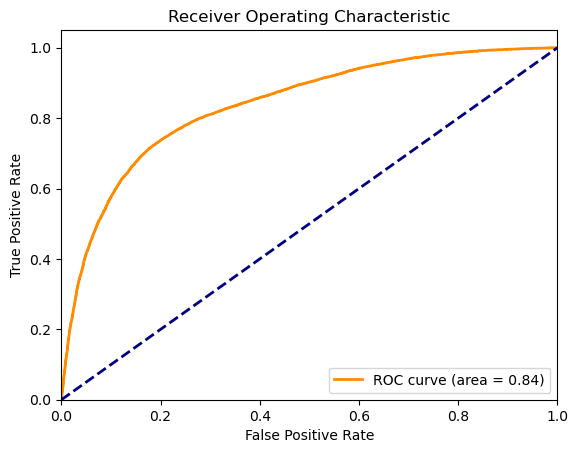

In [21]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y, Y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- __Curve Shape:__ The ROC curve starts at (0,0), rises steeply, and then flattens out as it approaches (1,1). It suggests that the model is able to achieve a high true positive rate (TPR) while maintaining a low false positive rate (FPR) for a range of threshold values.
- An __AUC of 0.84__ means that there is an 84% chance that the model will correctly distinguish between a randomly chosen positive instance and a negative one. This is significantly better than a random guess, which would have an AUC of 0.5.
- __Discrimination Ability:__ The curve being well above the diagonal line of no-discrimination indicates that the model has good discrimination ability. It can effectively separate the positive and negative classes.
- __Threshold Selection:__ The steep rise at the beginning of the curve suggests that there is a range of thresholds where the model can achieve high sensitivity (recall) without sacrificing specificity (1 - FPR).

# Performing tests to find significance of nunmber of screens with respect to enrollment status

In [22]:
import numpy as np
from scipy.stats import mannwhitneyu, kruskal

data = customer_data
# Assuming 'enrolled' is a binary variable indicating enrollment status (e.g., 0 for not enrolled, 1 for enrolled)
# and 'numscreens' is the variable of interest

# Separate 'numscreens' data based on enrollment status
numscreens_not_enrolled = data[data['enrolled'] == 0]['numscreens']
numscreens_enrolled = data[data['enrolled'] == 1]['numscreens']

# Perform Mann-Whitney U test
mw_stat, mw_pvalue = mannwhitneyu(numscreens_not_enrolled, numscreens_enrolled)
print("Mann-Whitney U Test:")
print("Statistic:", mw_stat)
print("p-value:", mw_pvalue)

# Perform Kruskal-Wallis H test
kw_stat, kw_pvalue = kruskal(numscreens_not_enrolled, numscreens_enrolled)
print("\nKruskal-Wallis H Test:")
print("Statistic:", kw_stat)
print("p-value:", kw_pvalue)

Mann-Whitney U Test:
Statistic: 202324549.0
p-value: 0.0

Kruskal-Wallis H Test:
Statistic: 4663.381544360486
p-value: 0.0


Mann-Whitney U Test:
Statistic: The Mann-Whitney U test statistic is a measure of the sum of ranks assigned to the values in the two samples. In this case, the statistic is 202324549.0.
p-value: The p-value associated with the Mann-Whitney U test is 0.0.
Analysis: With a p-value of 0.0, there is strong evidence to reject the null hypothesis that there is no difference between the distribution of numscreens for the two groups (enrolled and not enrolled). This indicates that there is a significant difference in the number of screens viewed by users who enrolled compared to those who did not enroll.
Kruskal-Wallis H Test:
Statistic: The Kruskal-Wallis H test statistic is a measure of the rank sum of the samples, adjusted for ties. In this case, the statistic is 4663.381544360486.
p-value: The p-value associated with the Kruskal-Wallis H test is 0.0.
Analysis: Similar to the Mann-Whitney U test, with a p-value of 0.0, there is strong evidence to reject the null hypothesis that there is no difference in the distribution of numscreens across all groups (enrolled and not enrolled). This indicates that there is a significant difference in the number of screens viewed across different enrollment statuses.